# Characteristics of Random Walks

## Stationary State

Let's dive into the math behind random walks in a way that's easy to understand.

Imagine you're at node $i$ at time $t$. You randomly move to a neighboring node $j$. The probability of this move, called the transition probability $p_{ij}$, is:

$$
p_{ij} = \frac{A_{ij}}{k_i},
$$

Here, $A_{ij}$ is an element of the adjacency matrix, and $k_i$ is the degree of node $i$. For a network with $N$ nodes, we can represent all transition probabilities in a transition probability matrix $P$:

$$
\mathbf{P} = \begin{pmatrix}
p_{11} & p_{12} & \cdots & p_{1N} \\
p_{21} & p_{22} & \cdots & p_{2N} \\
\vdots & \vdots & \ddots & \vdots \\
p_{N1} & p_{N2} & \cdots & p_{NN}
\end{pmatrix}
$$

This matrix $P$ encapsulates the entire random walk process. We can use it to calculate the probability of visiting each node after any number of steps. For instance:

- After one step: $P_{ij} = p_{ij}$
- After two steps: $\left(\mathbf{P}^{2}\right)_{ij} = \sum_{k} P_{ik} P_{kj}$
- After $T$ steps: $\left(\mathbf{P}^{T}\right)_{ij}$

```{note}
Let's explore why $\mathbf{P}^2$ represents the transition probabilities after two steps.

First, recall that $\mathbf{P}_{ij}$ is the probability of moving from node $i$ to node $j$ in one step. Now, consider a two-step walk from $i$ to $j$. We can express this as:

$$(\mathbf{P}^2)_{ij} = \sum_k \mathbf{P}_{ik} \mathbf{P}_{kj}$$

This equation encapsulates a key idea: to go from $i$ to $j$ in two steps, we must pass through some intermediate node $k$. Let's break this down step by step:

1. The probability of the first step ($i$ to $k$) is $\mathbf{P}_{ik}$.
2. The probability of the second step ($k$ to $j$) is $\mathbf{P}_{kj}$.
3. The probability of this specific path ($i$ → $k$ → $j$) is the product $\mathbf{P}_{ik} \mathbf{P}_{kj}$.
4. We sum over all possible intermediate nodes $k$ to get the total probability.

Likewise, for three steps, we have:

$$(\mathbf{P}^3)_{ij} = \sum_k \left( \mathbf{P}\right)^2_{ik} \mathbf{P}_{kj}$$

where:
1. The probability of going from $i$ to $k$ in two steps is $\left( \mathbf{P}\right)^2_{ik}$.
2. The probability of going from $k$ to $j$ in one step is $\mathbf{P}_{kj}$.
3. The probability of this specific path ($i$ →...→$k$ → $j$) is the product $\left( \mathbf{P}\right)^2_{ik} \mathbf{P}_{kj}$.
4. We sum over all possible intermediate nodes $k$ to get the total probability.

And we can extend this reasoning for any number of steps $t$.

In summary, for any number of steps $t$, $\left( \mathbf{P}^t \right)_{ij}$ gives the probability of being at node $j$ after $t$ steps, starting from node $i$.

```

As $T$ becomes very large, the probability distribution of being at each node, $\mathbf{x}(t)$, approaches a constant value:

$$
\mathbf{x}(t+1) =\mathbf{x}(t) \mathbf{P}
$$

This is an eigenvector equation. The solution, given by the Perron-Frobenius theorem, is called the stationary distribution:

$$
\mathbf{x}(\infty) = \mathbb{\pi}, \; \mathbf{\pi} = [\pi_1, \ldots, \pi_N]
$$

For undirected networks, this stationary distribution always exists and is proportional to the degree of each node:

$$
\pi_j = \frac{k_j}{\sum_{\ell} k_\ell} \propto k_j
$$

This means the probability of being at node $j$ in the long run is proportional to the degree of node $j$. The normalization ensures that the sum of all probabilities is 1, i.e., $\sum_{j=1}^N \pi_j = 1$.


## Experiment

Let us demonstrate the above math by using a small network using Python. Let us consider a small network of 5 nodes, which looks like this:

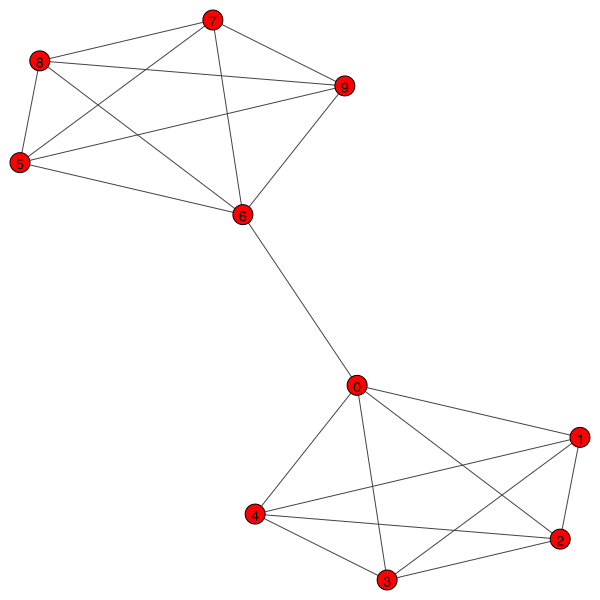

In [1]:
import igraph as ig
import numpy as np
edge_list = []
for i in range(5):
    for j in range(i+1, 5):
        edge_list.append((i, j))
        edge_list.append((i+5, j+5))
edge_list.append((0, 6))

g = ig.Graph(edge_list)
ig.plot(g, vertex_size=20, vertex_label=np.arange(g.vcount()))

The transition probability matrix $P$ is given by:

In [2]:
import scipy.sparse as sparse

A = g.get_adjacency_sparse()
deg = np.array(A.sum(axis=1)).flatten()
Dinv = sparse.diags(1/deg)
P = Dinv @ A
P.toarray()

array([[0.  , 0.2 , 0.2 , 0.2 , 0.2 , 0.  , 0.2 , 0.  , 0.  , 0.  ],
       [0.25, 0.  , 0.25, 0.25, 0.25, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.  , 0.25, 0.25, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.25, 0.25, 0.25],
       [0.2 , 0.  , 0.  , 0.  , 0.  , 0.2 , 0.  , 0.2 , 0.2 , 0.2 ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.25, 0.  , 0.25, 0.25],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.25, 0.25, 0.  , 0.25],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.25, 0.25, 0.25, 0.  ]])

Let us compute the stationary distribution by using the power method.

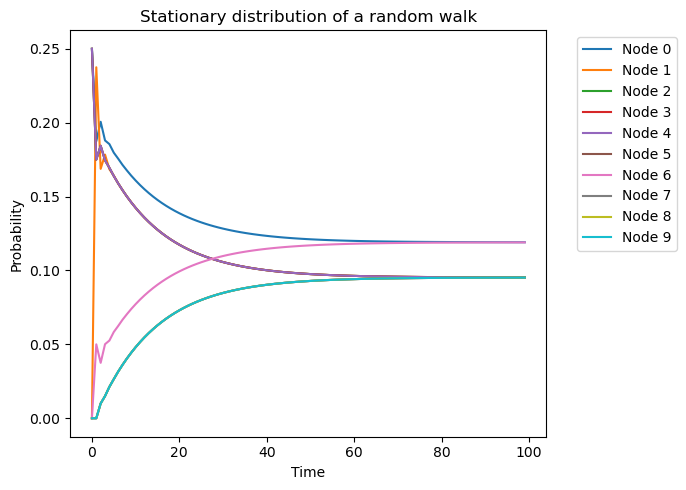

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

x = np.zeros(g.vcount())
x[1] = 1 # Start from node 1
T = 100
xt = []
for t in range(T):
    x = x.reshape(1, -1) @ P
    xt.append(x)

xt = np.vstack(xt) # Stack the results vertically

fig, ax = plt.subplots(figsize=(7,5))
palette = sns.color_palette().as_hex()
for i in range(g.vcount()):
    sns.lineplot(x=range(T), y=xt[:, i], label=f"Node {i}", ax=ax, color=palette[i])
ax.set_xlabel("Time")
ax.set_ylabel("Probability")
ax.set_title("Stationary distribution of a random walk")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

We see that the distributions of the walker converges, and there are three characteristic features in the convergence:
1. The distribution of the walker occilates with a decying amplitude and eventually converges.
2. Nodes of the same degree converge to the same stationary probability.
3. Nodes with higher degree converge to the higher stationary probability.

To validate the last two observation, let us compare the stationary distribution of a random walker with the expected stationary distribution, which is proportional to the degree of the nodes.

In [4]:
import pandas as pd

n_edges = np.sum(deg) / 2
expected_stationary_dist = deg / (2 * n_edges)

pd.DataFrame({
    "Expected stationary distribution": expected_stationary_dist,
    "Stationary distribution of a random walk": xt[-1].flatten()
}).style.format("{:.4f}").set_caption("Comparison of Expected and Observed Stationary Distributions").background_gradient(cmap='cividis', axis = None)


,Expected stationary distribution,Stationary distribution of a random walk
0,0.1190,0.1191
1,0.0952,0.0953
2,0.0952,0.0953
3,0.0952,0.0953
4,0.0952,0.0953
5,0.0952,0.0952
6,0.1190,0.1190
7,0.0952,0.0952
8,0.0952,0.0952
9,0.0952,0.0952


## Time to reach the stationary state

Let's explore how quickly a random walker reaches its stationary state. The convergence speed is influenced by two main factors: edge density and community structure. In sparse networks, the walker needs more steps to explore the entire network. Additionally, the walker tends to remain within its starting community for some time.

The mixing time, denoted as $t_{\text{mix}}$, is defined as the minimum number of steps required for a random walk to get close to the stationary distribution, regardless of the starting point, with the maximum error less than $\epsilon$:

$$t_{\text{mix}} = \min\{t : \max_{{\bf x}(0)} \|{\bf x}(t) - {\bf \pi}\|_{1} \leq \epsilon\}$$

where $\|{\bf x}(t) - {\bf \pi}\|_{1} = 2\max_{i} |x_i(t) - \pi_i|$ represents the L1 distance between two probability distributions. The choice of $\epsilon$ is arbitrary.

We know that the distribution of a walker after $t$ steps is given by:

$$
\mathbf{x}(t) =  \mathbf{x}(0) \mathbf{P} ^{t}
$$

To find this distribution, we need to compute $\mathbf{P}^t$. However, we face a challenge: $\mathbf{P}$ is not diagonalizable.

A diagonalizable matrix $\mathbf{S}$ can be written as $\mathbf{S} = \mathbf{Q} \mathbf{\Lambda} \mathbf{Q}^{-1}$, where $\mathbf{\Lambda}$ is a diagonal matrix and $\mathbf{Q}$ is an orthogonal matrix. Visually, it looks like this:

![](../figs/diagonalizable.jpg)

It is useful because we can then compute the power of the matrix as follows:

$$
\mathbf{S}^t = \mathbf{Q} \mathbf{\Lambda}^t \mathbf{Q}^{-1}
$$

And it is easy to find ${\bf Q}$ and ${\bf \Lambda}$ by using eigenvalue decomposition if ${\bf S}$ is symmetric and consists only of real values. Namely, the eigenvectors form ${\cal Q}$ and the eigenvalues form the diagonal matrix ${\cal \Lambda}$.

```{note}
Let us demonstrate the above relation by calculating $\mathbf{S}^2$.
$$
\begin{align}
\mathbf{S}^2 &= \mathbf{Q} \mathbf{\Lambda} \mathbf{Q}^{-1} \mathbf{Q} \mathbf{\Lambda} \mathbf{Q}^{-1} \\
&= \mathbf{Q} \mathbf{\Lambda}^2 \mathbf{Q}^{-1}.
\end{align}
$$
(Note that $\mathbf{Q} \mathbf{Q}^{-1} = {\bf I}$.)

![](../figs/diagonalizable-squared.jpg)

```


$\mathbf{P}$ is also diagonalizable but not symmetric like $\mathbf{\overline A}$ so that we cannot use the above relation directly. So we do a trick by rewriteing $\mathbf{P}$ as:

$$
\mathbf{P} = \mathbf{D}^{-1} \mathbf{A} = \mathbf{D}^{-\frac{1}{2}} \overline {\bf A} \mathbf{D}^{\frac{1}{2}}
$$

where $\overline{\bf A} = \mathbf{D}^{-\frac{1}{2}} \mathbf{A} \mathbf{D}^{-\frac{1}{2}}$ is the normalized adjacency matrix.

The advantage is that $\overline{\bf A}$ is diagonalizable: $\overline{\bf A} = \mathbf{Q} \mathbf{\Lambda} \mathbf{Q}^\top$. Using this, we can compute $\mathbf{P}^t$:

$$
\mathbf{P}^t = \mathbf{D}^{-\frac{1}{2}} \mathbf{Q} \mathbf{\Lambda}^t \mathbf{Q}^\top \mathbf{D}^{\frac{1}{2}} = \mathbf{Q}_L \mathbf{\Lambda}^t \mathbf{Q}_R ^\top
$$

where $\mathbf{Q}_L = \mathbf{D}^{-\frac{1}{2}} \mathbf{Q}$ and $\mathbf{Q}_R = \mathbf{D}^{\frac{1}{2}} \mathbf{Q}$.


```{note}
Let us demonstrate the above relation by calculating $\mathbf{P}^2$.

$$
\begin{align}
\mathbf{P}^2 &= \mathbf{D}^{-\frac{1}{2}} \overline{\bf A} \mathbf{D}^{\frac{1}{2}} \mathbf{D}^{-\frac{1}{2}} \overline{\bf A} \mathbf{D}^{\frac{1}{2}}\\
&=  \mathbf{D}^{-\frac{1}{2}} \overline{\bf A} ^2 \mathbf{D}^{\frac{1}{2}}\\
&= \mathbf{Q}_L \mathbf{\Lambda}^2 \mathbf{Q}_R ^\top
\end{align}
```

The probability distribution after $t$ steps is then:

$$
\mathbf{x}(t) = \mathbf{x}(0) \mathbf{Q}_L \mathbf{\Lambda}^t \mathbf{Q}_R ^\top
$$

We can rewrite this in a more intuitive form:

$$
\begin{pmatrix}
x_1(t) \\
x_2(t) \\
\vdots \\
x_N(t)
\end{pmatrix}
 =
 \sum_{\ell=1}^N
 \left[
 \lambda_\ell^t
 \begin{pmatrix}
 q^{(L)}_{\ell 1} \\
 q^{(L)}_{\ell 2} \\
 \vdots \\
 q^{(L)}_{\ell N}
 \end{pmatrix}
 \langle\mathbf{q}^{(R)}_{\ell},  \mathbf{x}(0) \rangle
 \right]
$$

```{note}
Visualize the above equation by using the following figure.

![](../figs/diagonalizable-sum.jpg)

```

The term $\lambda_\ell^t$ represents the contribution of each eigenvalue to the stationary distribution over time. As $t$ increases, all terms decay exponentially except for the largest eigenvalue ($\lambda_1 = 1$). This explains how the random walk converges to the stationary distribution:

$$
\pi_i = \lim_{t\to\infty} x_i(t) = \begin{pmatrix} q^{(L)}_{1 1} \\ q^{(L)}_{1 2} \\ \vdots \\ q^{(L)}_{1 N} \end{pmatrix} \langle\mathbf{q}^{(R)}_{1},  \mathbf{x}(0) \rangle
$$

The second largest eigenvalue primarily determines the convergence speed to the stationary distribution. A larger second eigenvalue leads to slower convergence. Thus, the mixing time is closely related to the second largest eigenvalue.

Levin-Peres-Wilmer theorem states that the mixing time is bounded by the relaxation time as

$$
t_{\text{mix}} < \tau \log \left( \frac{1}{\epsilon \min_{i} \pi_i} \right), \quad \tau = \frac{1}{\lambda_2}
$$

where $\lambda_2$ is the second largest eigenvalue of the normalized adjacency matrix. The mixing time is known to be bounded by the relaxation time as

More commonly, it is expressed using the second smallest eigenvalue $\mu$ of the normalized laplacian matrix as

$$
t_{\text{mix}} \leq \frac{1}{1-\mu}
$$

where $\mu = 1-\lambda_2$.


### Compute the mixing time

Let us demonstrate the above math by using the network of two cliques.

#### Normalized Adjacency Matrix

First, let us construct the normalized adjacency matrix $\overline{\bf A}$ of the network.

In [5]:
Dinv_sqrt = sparse.diags(1.0/np.sqrt(deg))
A_norm = Dinv_sqrt @ A @ Dinv_sqrt

Next, let us compute the eigenvalues and eigenvectors of the normalized adjacency matrix.

In [6]:
evals, evecs = np.linalg.eigh(A_norm.toarray())

```{note}
`evals` and `evecs` are sorted in descending order of the eigenvalues. `evecs[:, 0]` is the eigenvector corresponding to the largest eigenvalue, which is always 1.
```

```{warning}
There is a similar function called `np.linalg.eig` which returns the eigenvalues and eigenvectors. It can be used for any matrices, while `np.linalg.eigh` is specifically for symmetric matrices. `np.linalg.eigh` is faster and more stable and therefore preferred if your matrix is symmetric. `np.linalg.eig` is more susceptible to numerical errors and therefore less stable.
```

The eigenvalues and eigenvectors are shown below.

In [7]:
pd.DataFrame({
    "Eigenvalue": evals
}).T.style.background_gradient(cmap='cividis', axis = 1).set_caption("Eigenvalues of the normalized adjacency matrix")

,0,1,2,3,4,5,6,7,8,9
Eigenvalue,-0.377399,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.250000,-0.050000,0.927399,1.000000


In [8]:
pd.DataFrame({
    "Eigenvector %i" % i: evecs[:, i]
    for i in range(10)
}).style.background_gradient(cmap='cividis', axis = None).set_caption("Eigenvectors of the normalized adjacency matrix")

,Eigenvector 0,Eigenvector 1,Eigenvector 2,Eigenvector 3,Eigenvector 4,Eigenvector 5,Eigenvector 6,Eigenvector 7,Eigenvector 8,Eigenvector 9
0,0.657283,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.617213,-0.260729,-0.345033
1,-0.130364,-0.395607,-0.167115,-0.635088,0.377982,-0.109651,0.085655,0.172516,-0.328641,-0.308607
2,-0.130364,0.800243,-0.120594,0.109654,0.270761,-0.078571,0.059661,0.172516,-0.328641,-0.308607
3,-0.130364,0.043653,0.337951,-0.209252,-0.726570,0.211234,-0.132565,0.172516,-0.328641,-0.308607
4,-0.130364,-0.448289,-0.050242,0.734686,0.077827,-0.023012,-0.012750,0.172516,-0.328641,-0.308607
5,0.130364,0.002451,-0.744000,-0.005243,-0.389952,-0.025459,0.209091,0.172516,0.328641,-0.308607
6,-0.657283,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.617213,0.260729,-0.345033
7,0.130364,-0.012144,0.509719,0.025972,0.023835,-0.312907,0.625208,0.172516,0.328641,-0.308607
8,0.130364,0.009181,0.116681,-0.019635,0.060166,-0.455656,-0.724343,0.172516,0.328641,-0.308607
9,0.130364,0.000511,0.117600,-0.001094,0.305952,0.794023,-0.109956,0.172516,0.328641,-0.308607


Notice that the largest eigenvalue is 1, which is always true for a normalized adjacency matrix.
The largest eigenvector (the leftmost one) is associated with the stationary distribution of the random walk.

```{note}
The sign of the eigenvector is indeterminate, which means we can choose the sign of the eigenvector arbitrarily. In fact, `np.linalg.eigh` returns the eigenvector whose sign can vary for a different run.
```

We decompose $\overline{\bf A}$ as

$$\overline {\bf A} = {\bf Q}{\bf \Lambda}{\bf Q}^\top$$

where ${\bf Q}$ corresponds to `eigvecs` and ${\bf \Lambda}$ corresponds to `np.diag(evals)` (since ${\bf \Lambda}$ is a diagonal matrix). Let's see if this is correct:

In [9]:
pd.DataFrame(A_norm.toarray()).style.background_gradient(cmap='cividis', axis = None).set_caption("Normalized Adjacency Matrix")

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.223607,0.223607,0.223607,0.223607,0.000000,0.200000,0.000000,0.000000,0.000000
1,0.223607,0.000000,0.250000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.223607,0.250000,0.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.223607,0.250000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.223607,0.250000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.223607,0.250000,0.250000,0.250000
6,0.200000,0.000000,0.000000,0.000000,0.000000,0.223607,0.000000,0.223607,0.223607,0.223607
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.223607,0.000000,0.250000,0.250000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.223607,0.250000,0.000000,0.250000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.223607,0.250000,0.250000,0.000000


In [10]:
A_norm_reconstructed = evecs @ np.diag(evals) @ evecs.T
pd.DataFrame(A_norm_reconstructed).style.background_gradient(cmap='cividis', axis = None).set_caption("Reconstruction of the Normalized Adjacency Matrix")

,0,1,2,3,4,5,6,7,8,9
0,-0.000000,0.223607,0.223607,0.223607,0.223607,0.000000,0.200000,0.000000,0.000000,0.000000
1,0.223607,-0.000000,0.250000,0.250000,0.250000,-0.000000,-0.000000,0.000000,0.000000,0.000000
2,0.223607,0.250000,-0.000000,0.250000,0.250000,-0.000000,0.000000,0.000000,0.000000,0.000000
3,0.223607,0.250000,0.250000,-0.000000,0.250000,0.000000,-0.000000,-0.000000,0.000000,-0.000000
4,0.223607,0.250000,0.250000,0.250000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000
5,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.223607,0.250000,0.250000,0.250000
6,0.200000,-0.000000,0.000000,-0.000000,-0.000000,0.223607,-0.000000,0.223607,0.223607,0.223607
7,0.000000,0.000000,0.000000,-0.000000,0.000000,0.250000,0.223607,-0.000000,0.250000,0.250000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.223607,0.250000,-0.000000,0.250000
9,0.000000,0.000000,0.000000,-0.000000,0.000000,0.250000,0.223607,0.250000,0.250000,-0.000000


Notice that the reconstruction is not perfect due to the numerical error, although overall the structure is correct.

#### Multi-step Transition Probability

Let us first conform whether we can compute the transition probability after $t$ steps by using the eigenvalues and eigenvectors.

In [11]:
t = 5
x_0 = np.zeros(g.vcount())
x_0[0] = 1

# Compute x_t by using the eigenvalues and eigenvectors
Q_L = np.diag(1.0/np.sqrt(deg)) @ evecs
Q_R = np.diag(np.sqrt(deg)) @ evecs
x_t = x_0 @ Q_L @ np.diag(evals**t) @ Q_R.T

# Compute x_t by using the power iteration
x_t_power = x_0.copy()
for i in range(t):
    x_t_power = x_t_power @ P

pd.DataFrame({
    "Eigenvector": x_t.flatten(),
    "Power iteration": x_t_power.flatten()
}).style.background_gradient(cmap='cividis', axis = None).set_caption("Comparison of Eigenvector and Power Iteration")

,Eigenvector,Power iteration
0,0.162375,0.162375
1,0.148401,0.148401
2,0.148401,0.148401
3,0.148401,0.148401
4,0.148401,0.148401
5,0.042075,0.042075
6,0.075720,0.075720
7,0.042075,0.042075
8,0.042075,0.042075
9,0.042075,0.042075


#### Relaxation Time and Mixing Time

Let us measure the relaxation time of the random walk.

In [12]:
evals, evecs = np.linalg.eigh(A_norm.toarray())
lambda_2 = -np.sort(-evals)[1]
tau = 1 / lambda_2
print(f"The relaxation time of the random walk is {tau:.4f}.")

The relaxation time of the random walk is 1.0783.
